In [1]:
!pip install seaborn
!pip install pydantic-settings
#!pip install pandas-profiling
!pip install ydata-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=f1436af5250bf79675ee9ff3931b729ebece883c84bf4bfcfdded98c1457fb08
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)



In [4]:
df= pd.read_excel('/content/datainexcel.xlsx')

In [ ]:
report = ProfileReport(df, title='My Data')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
import re
def extract_hashtags_from_full_text(tweet):
    # Handle potential non-string values
    if isinstance(tweet, str):
        hashtags = re.findall(r'(?:#|\$)\w+', tweet)
        return hashtags
    else:
        return []  # Return an empty list for non-string values

# Apply the function to the DataFrame
df['hashtags'] = df['full_text'].apply(extract_hashtags_from_full_text)

# Print the result
print(df[['hashtags']])
df.loc[1]['hashtags']

In [6]:
# Flatten the list of hashtags and remove duplicates
all_hashtags = set([hashtag for sublist in df['hashtags'] for hashtag in sublist])

# Print the unique hashtags
print(all_hashtags)# Flatten the list of hashtags and remove duplicates


{'#PROFIT', '$TXRH', '#vintagebooks', '#maddow', '#assest', '#pademic', '#easyjet', '#FunnyMoney', '$CAPN', '$HEIJM', '#hpcl', '$69M', '#HSI', '#Braves', '#respectthegrind', '#Entra', '$WNT', '#dianna', '#ArcelorMittal', '#FISKER', '#Qantas', '$706', '$FFA', '$IB', '#futuregroup', '#justaflu', '#USCRude', '#ReliefBill', '#CURE', '#gigi', '$HEXA', '#pickoftheday', '$NQMI', '$eem', '#LMU', '#gdax', '#thursdaytrade', '#Upgrade', '#why', '#Watch', '#EmergingMarkets', '$ukx100', '#userinter', '$TYG', '#Insurrection', '#protesra', '$TELIA', '#TmobileOutage', '#bloodbath', '#Camlin', '#pennysto', '#algotrade', '#reversestocksplit', '#legget', '#transfer', '#microbattery', '#cnnmoney', '#Coverup', '#mappingplatforms', '#DMDchampion', '#changeisconstant', '$opes', '$SUV', '#bhansali', '#Billings', '#tweeter', '#LUFTHANSA', '$GENL', '$2599', '$ENGMF', '#Satya_Nadella', '$AKSO', '#marketslump', '#beammeup', '#orthopaedics', '$IWA', '$GWSO', '#EnerpacToolGroup', '#booksfortrade', '#trailhead', '#A

In [ ]:
for i in all_hashtags:
  print(i)

Streaming output truncated to the last 5000 lines.
#alwayslearning
$RPM
#StopTheSpreadOfCorona
$AMBA
$WWW
$BEL20
#gbpusd
#etf
#GBPCHF
#freebooks
$2805
#March
#boei
$560
#CanadaGooseInc
$SCHW
$TPB
$Oil
$CNX
$BIMI
#SPI200
#Merger
$NAIL
#stim
$TWO
$DECK
#coronavirusoutbreak
#USDollarIndex
#H1B
$matic
#TBT
$CFG
#tradingplan
$NYSEAMERICAN
$EV
#stockoptions
$425
#bank
#freesignal
$nbev
#vwap
#futures
$CWK
#StockTextsFromDad
#printing
$EYE
#pansion
#forexnews
$8877
$MDIV
#forextradin
$70C
$AA
#superfoods
$4bln
$twtr
#hedge
$CNO
$TDOC
#California
#SoutheastAsia
#TradeWar
$AVB
$MGEN
$1690
#NYTimes
#Infographics
#kazonomics
$183
#vintners
#firsttake
$BZH
#nasdaq
#MoneyHeist
#FOREXTRADING
#الامارات
$SERV
#Eurobonds
$RUNNERAUTO
$RWM
#ThinkOrSwim
#es_f
#Misr
#EARNINGS
$SBSI
$BRFH
$RDNT
#eng
$217
#knowledge
$RTON
$TCON
$cyst
$HCA
$IYG
$EOS
#HealthForAll
$028260
#Fish
#btgtraders
#TwitterSmarter
#covid2019
#Saudi
#NewsUpdates
#nas100
#Centene
$KAOOY
#Jlo
#etoro
#ZB
$TSX
#investmentmanagement
#Goldman

In [7]:
# Handle missing values in 'full_text' column before filtering
filtered_df = df[df['full_text'].str.contains('AAPL', na=False)]

In [8]:
filtered_df["sent_score"] = ''
filtered_df["pos_score"] = ''
filtered_df["neu_score"] = ''
filtered_df["neg_score"] = ''

In [9]:
!pip install nltk # Install nltk if not already installed
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
%%time
sent_analyze = SentimentIntensityAnalyzer()
for ind,row in filtered_df.T.items():
    sentence_i = unicodedata.normalize("NFKD", filtered_df.loc[ind,"full_text"])
    sent_sent = sent_analyze.polarity_scores(sentence_i)
    filtered_df.at[ind,"sent_score"] = sent_sent["compound"]
    filtered_df.at[ind,"pos_score"] = sent_sent["pos"]
    filtered_df.at[ind,"neu_score"] = sent_sent["neu"]
    filtered_df.at[ind,"neg_score"] = sent_sent["neg"]


CPU times: user 58 s, sys: 436 ms, total: 58.5 s
Wall time: 59.8 s


In [11]:
    filtered_df[filtered_df['created_at'].dt.date == pd.to_datetime('2020-04-14').date()]['sent_score'].mean()

0.1902737263464334

In [14]:
import pandas as pd
#AppleSentiment_df=pd.DataFrame(columns=['date','sent_score'])

# Convert the 'date' column to datetime if it's not already
#AppleSentiment_df['date'] = pd.to_datetime(filtered_df['created_at']).dt.date.drop_duplicates()

# Group by date and calculate the mean sentiment score for each day
# Use 'sent_score' instead of 'sentiment_score' and remove the extra .filtered_df
AppleSentiment_df = filtered_df.groupby(filtered_df['created_at'].dt.date)['sent_score'].mean()

# If you want to see the result
print(AppleSentiment_df)
AppleSentiment_df=AppleSentiment_df.to_frame()
# If you want to save the result to a CSV
AppleSentiment_df.to_csv('daily_sentiment.csv')
print(AppleSentiment_df.index.name)

AppleSentiment_df.columns[0]
AppleSentiment_df.reset_index()

created_at
2020-04-09     0.12907
2020-04-10    0.184262
2020-04-11    0.012028
2020-04-12    0.070255
2020-04-13    0.147374
2020-04-14    0.190274
2020-04-15    0.152239
2020-04-16    0.118437
2020-04-17    0.054902
2020-04-18     0.07522
2020-04-19    0.085591
2020-04-20    0.115952
2020-04-21    0.114191
2020-04-22     0.12742
2020-04-23    0.092235
2020-04-24    0.093623
2020-04-25      0.0696
2020-04-26    0.117736
2020-04-27    0.096979
2020-04-28    0.106729
2020-04-29    0.151894
2020-04-30     0.20334
2020-05-03    0.063597
2020-05-04    0.107579
2020-05-05    0.142991
2020-05-06    0.142686
2020-05-07    0.168533
2020-05-08    0.175367
2020-05-09    0.198537
2020-05-10    0.121433
2020-05-28    0.135269
2020-05-29    0.165326
2020-05-30    0.171579
2020-05-31    0.147874
2020-06-01    0.115991
2020-06-02    0.100552
2020-06-03    0.137053
2020-06-04    0.155117
2020-06-05    0.152023
2020-06-06    0.195923
2020-06-07    0.209416
2020-06-08     0.16977
2020-06-09    0.144363


,created_at,sent_score
0,2020-04-09,0.12907
1,2020-04-10,0.184262
2,2020-04-11,0.012028
3,2020-04-12,0.070255
4,2020-04-13,0.147374
5,2020-04-14,0.190274
6,2020-04-15,0.152239
7,2020-04-16,0.118437
8,2020-04-17,0.054902
9,2020-04-18,0.07522


In [22]:
AppleSentiment_df.columns.tolist()

AppleSentiment_df = AppleSentiment_df.rename(columns={'index': 'created_at'})
#AppleSentiment_df['created_at']
AppleSentiment_df['date']=AppleSentiment_df.index
AppleSentiment_df = AppleSentiment_df.reset_index(drop=True)
AppleSentiment_df.columns.tolist()


['sent_score', 'date']

In [24]:
# Assuming AppleSentiment_df is already defined and contains the 'date' column
# Example DataFrame creation (if needed):
# AppleSentiment_df = pd.DataFrame({'created_at': ['2024-07-10', '2024-07-10', '2024-07-11', '2024-07-12', '2024-07-12']})

# Find repeated dates
repeated_dates = AppleSentiment_df['date'].value_counts()
repeated_dates = repeated_dates[repeated_dates > 1]

# Display repeated dates
print(repeated_dates)

Series([], Name: count, dtype: int64)


In [26]:
(df['created_at'].groupby(df['created_at'].dt.date).count()).info()



<class 'pandas.core.series.Series'>
Index: 81 entries, 2020-04-09 to 2020-07-17
Series name: created_at
Non-Null Count  Dtype
--------------  -----
81 non-null     int64
dtypes: int64(1)
memory usage: 1.3+ KB


In [27]:
df['created_at'].min(),  df['created_at'].max()

(Timestamp('2020-04-09 01:00:01'), Timestamp('2020-07-17 00:59:13'))

In [28]:
import yfinance as yf
import pandas as pd

# Set the ticker symbol for Apple
ticker = "AAPL"

# Set the start and end dates
start_date = '2020-04-09'
end_date = '2020-07-17'

# Fetch the daily data
stock_data = yf.Ticker(ticker).history(start=start_date, end=end_date, interval="1d")

# Remove time from the date index
stock_data.index = stock_data.index.date

# Display the first few rows of the data
print(stock_data.head(50))

                 Open       High        Low      Close     Volume  Dividends  Stock Splits
2020-04-09  65.427014  65.760601  64.453035  65.254128  161834800      0.000           0.0
2020-04-13  65.332040  66.644480  64.728171  66.534904  131022800      0.000           0.0
2020-04-14  68.178507  70.187338  67.703690  69.895142  194994800      0.000           0.0
2020-04-15  68.762893  69.719825  68.331910  69.257187  131154400      0.000           0.0
2020-04-16  69.975492  70.175159  68.750714  69.807480  157125200      0.000           0.0
2020-04-17  69.320484  69.870784  67.413917  68.860275  215250000      0.000           0.0
2020-04-20  67.679339  68.587569  67.411493  67.430969  130015200      0.000           0.0
2020-04-21  67.272700  67.508890  64.630782  65.346657  180991600      0.000           0.0
2020-04-22  66.622560  67.667154  66.279239  67.228867  116862400      0.000           0.0
2020-04-23  67.172865  68.604615  66.929370  66.968330  124814400      0.000           0.0

In [136]:
stock_data.columns.tolist()

['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [30]:
# stock_data = stock_data.set_index('index')
# merged_df = pd.merge(AppleSentiment_df, stock_data, left_on='date', right_on='index', how='outer')
merged_df = pd.merge(AppleSentiment_df, stock_data, left_on='date', right_index=True, how='outer')
merged_df.columns.tolist()

['sent_score',
 'date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits']

In [31]:
# Assuming merged_df is already defined and contains the 'date' column
# Example DataFrame creation (if needed):
# merged_df = pd.DataFrame({'created_at': ['2024-07-10', '2024-07-10', '2024-07-11', '2024-07-12', '2024-07-12']})

# Find repeated dates
repeated_dates = merged_df['date'].value_counts()
repeated_dates = repeated_dates[repeated_dates > 1]

# Display repeated dates
print(repeated_dates)

Series([], Name: count, dtype: int64)


In [29]:
print("AppleSentiment_df columns:")
print(AppleSentiment_df.columns)
print("\nstock_data index name:")
print(stock_data.index.name)
print("\nstock_data columns:")
print(stock_data.columns)

AppleSentiment_df columns:
Index(['sent_score', 'date'], dtype='object')

stock_data index name:
None

stock_data columns:
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [37]:
print(merged_df.head(100))
print(merged_df.info())
merged_df.to_csv('merged_df.csv')
sorted_df = merged_df.sort_values(by="date")


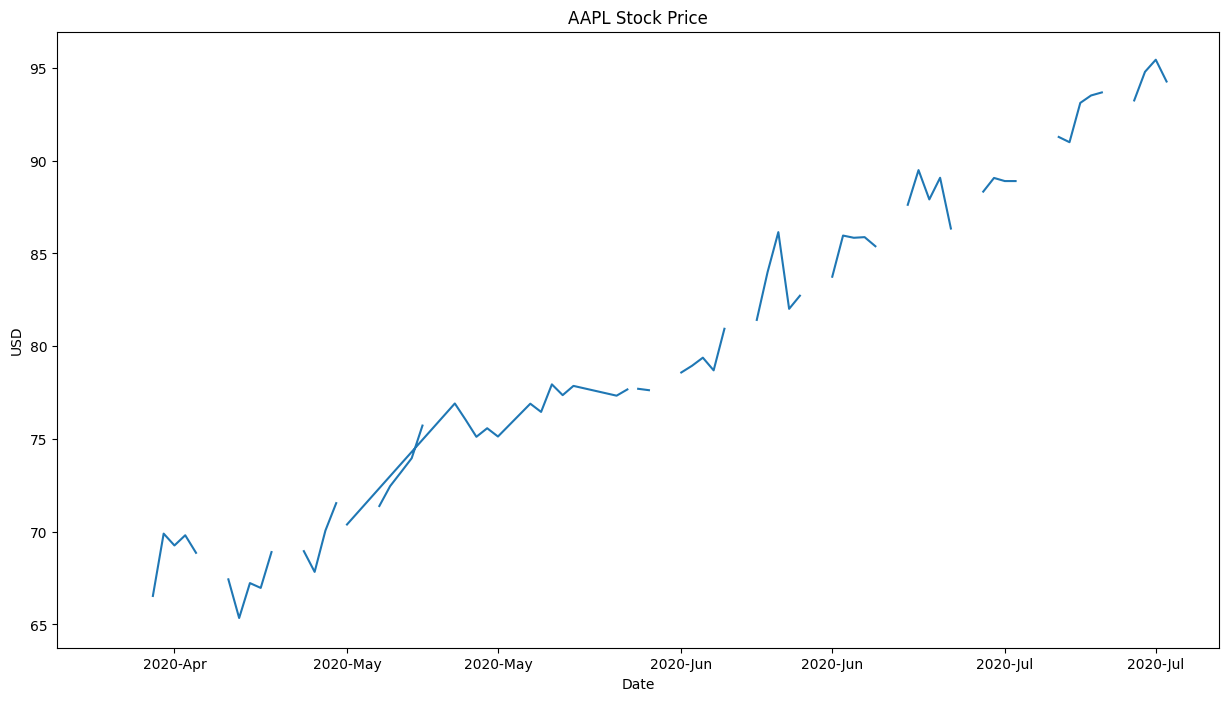

In [38]:
from matplotlib.dates import DateFormatter

stk_name = "AAPL"
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(merged_df["date"], merged_df["Close"])
ax.set(xlabel="Date", ylabel="USD", title=f"{stk_name} Stock Price")

# Set the date format to display year and month (e.g., "2022-Jan")
date_form = DateFormatter("%Y-%b")  # %b stands for abbreviated month name
ax.xaxis.set_major_formatter(date_form)

plt.show()

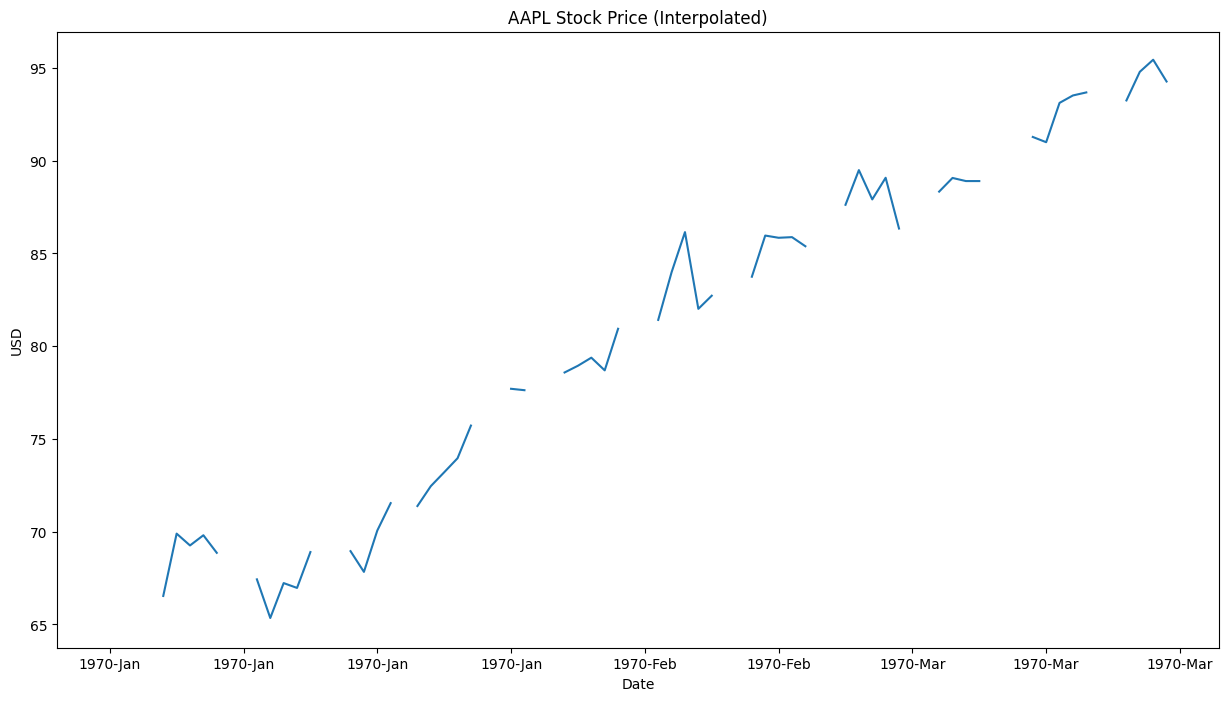

In [53]:
fig, ax = plt.subplots(figsize=(15, 8))

# Alternative plotting command
merged_df['Close'].plot(figsize=(15, 8), ax=ax)

ax.set(xlabel="Date", ylabel="USD", title=f"{stk_name} Stock Price (Interpolated)")

# Set the date format to display year and month (e.g., "2022-Jan")
date_form = DateFormatter("%Y-%b")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [36]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

print(merged_df[(merged_df['date'] >= '2020-04-01') & (merged_df['date'] <= '2020-07-31')])


     sent_score       date       Open       High        Low      Close       Volume  Dividends  Stock Splits
0.0     0.12907 2020-04-09  65.427014  65.760601  64.453035  65.254128  161834800.0      0.000           0.0
1.0    0.184262 2020-04-10        NaN        NaN        NaN        NaN          NaN        NaN           NaN
2.0    0.012028 2020-04-11        NaN        NaN        NaN        NaN          NaN        NaN           NaN
3.0    0.070255 2020-04-12        NaN        NaN        NaN        NaN          NaN        NaN           NaN
4.0    0.147374 2020-04-13  65.332040  66.644480  64.728171  66.534904  131022800.0      0.000           0.0
5.0    0.190274 2020-04-14  68.178507  70.187338  67.703690  69.895142  194994800.0      0.000           0.0
6.0    0.152239 2020-04-15  68.762893  69.719825  68.331910  69.257187  131154400.0      0.000           0.0
7.0    0.118437 2020-04-16  69.975492  70.175159  68.750714  69.807480  157125200.0      0.000           0.0
8.0    0.054902 202

In [43]:
Copy_merged_df=merged_df.copy()
print(merged_df.isna().sum())
# Assuming merged_df already exists
Copy_merged_df = Copy_merged_df.dropna(subset=['date']) # Drop rows with NaNs in the 'date' column
Copy_merged_df = Copy_merged_df.set_index('date') # Set 'date' column as index
Copy_merged_df['Close'] = Copy_merged_df['Close'].interpolate(method='time')
print(Copy_merged_df.isna().sum())


sent_score      13
date             0
Open            26
High            26
Low             26
Close           26
Volume          26
Dividends       26
Stock Splits    26
dtype: int64
sent_score      13
Open            26
High            26
Low             26
Close            0
Volume          26
Dividends       26
Stock Splits    26
dtype: int64


In [51]:
Copy_merged_df.columns.tolist()
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

# Assuming Copy_merged_df is already prepared as per the previous solution

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(Copy_merged_df.index, Copy_merged_df["Close"])  # Plot using the 'date' index
ax.set(xlabel="Date", ylabel="USD", title=f"{stk_name} Stock Price (Interpolated)")
Copy_merged_df['Close'].plot(figsize=(15, 8), ax=ax)

# Set the date format to display year and month (e.g., "2022-Jan")
date_form = DateFormatter("%Y-%b")
ax.xaxis.set_major_formatter(date_form)

plt.show()

<Axes: title={'center': 'AAPL Stock Price (Interpolated)'}, xlabel='date', ylabel='USD'>

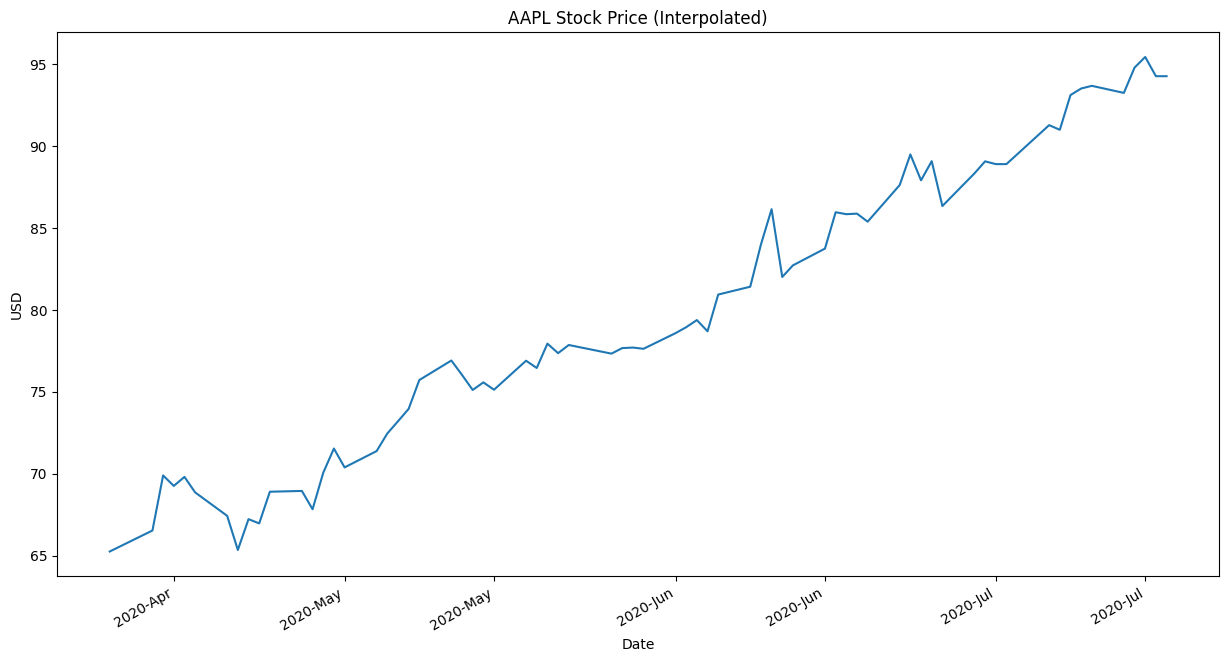

In [52]:
# Assuming Copy_merged_df is already prepared and 'date' is set as index

fig, ax = plt.subplots(figsize=(15, 8))

# Alternative plotting command
Copy_merged_df['Close'].plot(figsize=(15, 8), ax=ax)

ax.set(xlabel="Date", ylabel="USD", title=f"{stk_name} Stock Price (Interpolated)")

# Set the date format to display year and month (e.g., "2022-Jan")
date_form = DateFormatter("%Y-%b")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [47]:
# Assuming merged_df is already defined and contains the 'date' column
# Example DataFrame creation (if needed):
# merged_df = pd.DataFrame({'created_at': ['2024-07-10', '2024-07-10', '2024-07-11', '2024-07-12', '2024-07-12']})

# Find repeated dates
repeated_dates = Copy_merged_df.index.value_counts()
repeated_dates = repeated_dates[repeated_dates > 1]

# Display repeated dates
print(repeated_dates)

Series([], Name: count, dtype: int64)


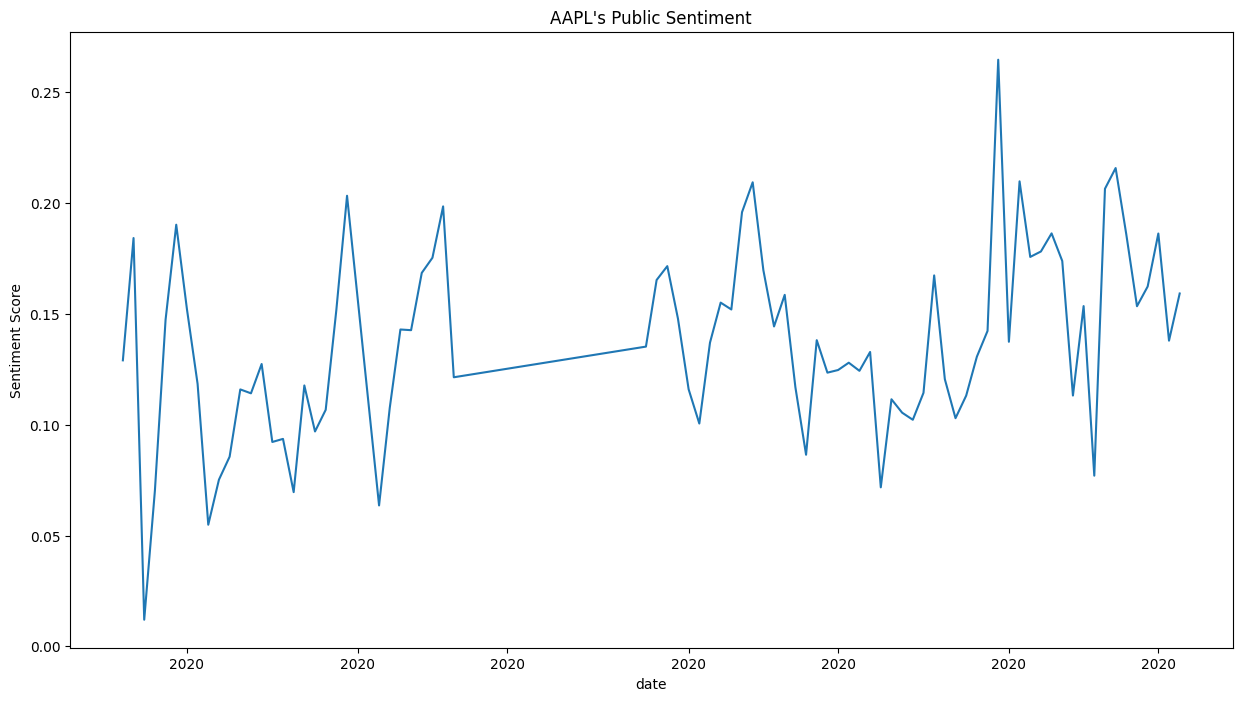

In [157]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(merged_df["date"], merged_df["sent_score"])
ax.set(xlabel="date",ylabel="Sentiment Score",title=f"{stk_name}'s Public Sentiment")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()